In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [269]:
df = pd.read_csv("2016_Taiwan_index.csv", index_col = 0)
##df = df[df["Date"] <= "2017/06/06"]

In [270]:
df

,Date,Time,Open,High,Low,Close,Mean,Variance
0,2016/01/04,09:29:55,8338.06,8338.06,8215.64,8215.64,8272.268,1363.923
1,2016/01/04,09:59:55,8214.68,8214.68,8151.58,8160.75,8181.038,307.918
2,2016/01/04,10:29:55,8158.19,8166.35,8109.09,8124.52,8134.721,228.027
3,2016/01/04,10:59:55,8129.48,8156.19,8122.40,8154.11,8140.274,53.370
4,2016/01/04,11:29:55,8154.14,8158.11,8136.83,8152.62,8145.440,20.845
...,...,...,...,...,...,...,...,...
9994,2020/07/31,11:29:55,12672.74,12679.18,12655.45,12673.87,12669.328,34.220
9995,2020/07/31,11:59:55,12677.63,12704.79,12671.56,12701.56,12684.091,71.102
9996,2020/07/31,12:29:55,12696.78,12712.63,12681.82,12710.60,12692.143,66.087
9997,2020/07/31,12:59:55,12705.62,12720.02,12703.27,12714.58,12709.548,14.870


In [271]:
## to stationary
df["diff"] = (df["Open"] - df["Mean"])

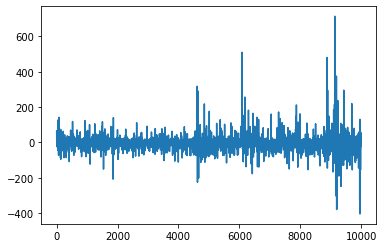

In [272]:
plt.plot(df["diff"])

In [274]:
df["diff"]= (df[["diff"]] - df["diff"].mean()) / df["diff"].std()

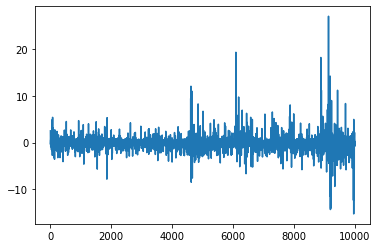

In [275]:
plt.plot(df["diff"])

In [276]:
from statsmodels.tsa.stattools import adfuller
X = df["diff"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.510792
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [283]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

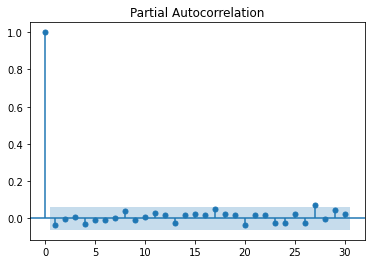

In [324]:
plot_pacf(X[:1000])
plt.show()

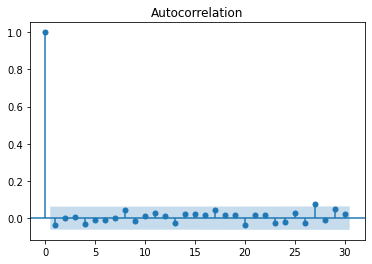

In [326]:
plot_acf(X[:1000])
plt.show()

In [327]:
#create the model
X_train = X[:1000]
model = ARIMA(X, order=(4,1,0))

/Users/liuminghan/Desktop/Taiwan_Index/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [328]:
model_fit = model.fit()

In [329]:
prediction = model_fit.forecast(100)

In [330]:
prediction_ = prediction[0]
lower_bound = prediction[2][:,0]
upper_bound = prediction[2][:,1]

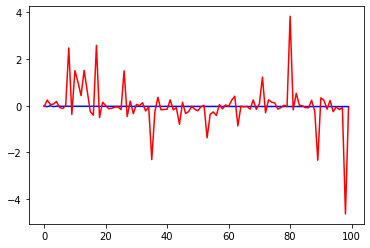

In [331]:
plt.plot(prediction_, color = "b")
plt.plot(X[1000:1100].reset_index(drop = True), color = "r")

In [375]:
import random 

In [378]:



position_list = []

for j in range(10000):
    
    position = 0
    
    for i in range(100):
        rv = random.randint(0,1)

        if rv == 1:
            position +=1
        if rv == 0:
            position -=1
        position_list.append(abs(position))
    


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

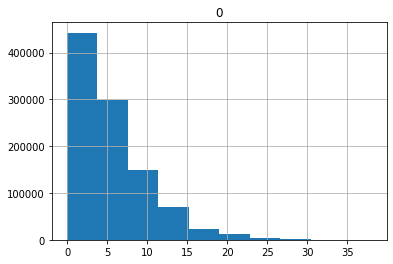

In [379]:
pd.DataFrame(position_list).hist()

In [381]:
np.sum(position_list) / 1000000

5.345218